# Flu Shot Learning: Predicting H1N1 and Seasonal Flu Vaccines

## Importing requirements

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

#Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Visualisations
from pandas_profiling import ProfileReport
import missingno as mno

#Models
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN
import xgboost as xgb
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

#Parameter Search
from sklearn.model_selection import GridSearchCV

#Metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


## Loading data

In [424]:
#Opening both datasets with pandas
features = pd.read_csv("training_set_features.csv")
labels = pd.read_csv("training_set_labels.csv")

In [425]:
#Combining the labels with the features for convenience
data = pd.merge(features, labels)
data.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


## Exploration

In [426]:
data.shape

(26707, 38)

The dataset used consists of 26,707 responses and 38 feature, two of which are our labels/targets

In [427]:
data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [428]:
data.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

We can see the data types available for this dataset are 25 instances of floats, 1 integer and 12 objects.

In [430]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [431]:
profile = ProfileReport(data, title="H1N1 and Seasonal Flu Vaccines")

In [432]:
#profile

In [433]:
features = data.iloc[:, :-2]
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [434]:
labels = data.iloc[:, -2:]
labels.head()

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


## Pre-Processing

In [435]:
#Checking for duplicates
features.duplicated().sum()

0

In [436]:
features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

There are no duplicates in this dataset

We drop the random-coded independent variables as they cannot be decoded:
- hhs_geo_region
- employment_industry
- employment_occupation


In [437]:
features.drop(["hhs_geo_region", "employment_industry", "employment_occupation"], axis = 1, inplace = True)
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


<AxesSubplot: >

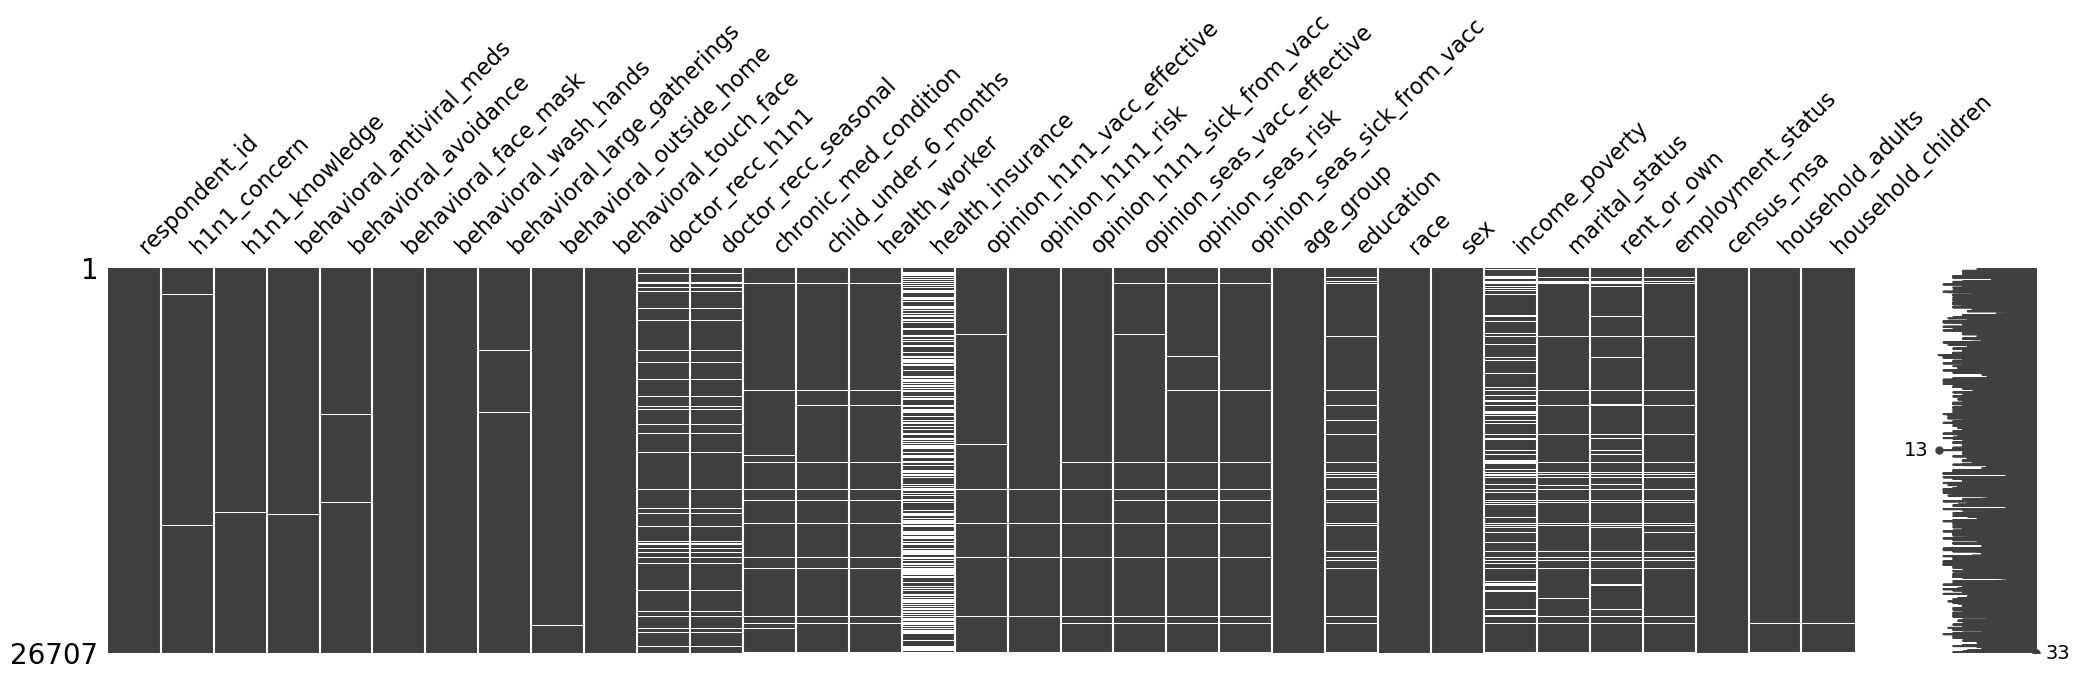

In [438]:
mno.matrix(features, figsize = (25, 5))

In [439]:
#We can remove respondent_id since it is deemed redundant
features.drop(['respondent_id'], axis = 1, inplace=True)

In [440]:
missing_data = features.isnull().sum()/len(data)*100
missing_data.sort_values(ascending=False)

health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern                    0.344479
behavioral_large_gatherings     0.325757
behavioral_outsi

We can see that the health_insurance feature has missing data over 45%

In [441]:
features.drop(['health_insurance'], axis = 1, inplace = True)

### Encoding

We convert all columns with a float dtype into an integer as they all do not lose any value after the decimal, alongside encoding all categorical data into a numeric form.

In [451]:
from sklearn.preprocessing import OneHotEncoder
# create an encoder and fit the dataframe
enc = OneHotEncoder(sparse=False).fit(features)
encoded = enc.transform(features)

c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [452]:
# convert it to a dataframe
features = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
encoded_df.head()

,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_concern_nan,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,h1n1_knowledge_nan,behavioral_antiviral_meds_0.0,...,household_adults_0.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_adults_nan,household_children_0.0,household_children_1.0,household_children_2.0,household_children_3.0,household_children_nan
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [453]:
features.shape

(26707, 124)

In [398]:
enc = LabelEncoder()
features[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']] = data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']].apply(enc.fit_transform)

features[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,3,1,3,0,2,1,0,1,2
1,1,0,3,1,2,1,1,0,0
2,0,2,3,1,0,1,0,0,0
3,4,0,3,0,2,1,1,1,1
4,2,3,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
26702,4,3,3,0,0,1,0,1,2
26703,0,2,3,1,0,1,1,0,1
26704,3,3,3,0,3,1,0,3,0
26705,0,3,1,0,0,0,1,0,2


### Imputation of the missing data

Our dataset is quite imbalanced so we can impute this missing data to balance it out

In [320]:

#Assigning the numerical data to a variable
numeric_data = features._get_numeric_data()
numeric_data.shape


(26707, 31)

In [321]:

#Imputing Numerical Data with the median
for column in numeric_data:
    features[column].fillna(features[column].median(), inplace= True)


In [322]:
features.isnull().sum()/len(data)*100

h1n1_concern                   0.0
h1n1_knowledge                 0.0
behavioral_antiviral_meds      0.0
behavioral_avoidance           0.0
behavioral_face_mask           0.0
behavioral_wash_hands          0.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
behavioral_touch_face          0.0
doctor_recc_h1n1               0.0
doctor_recc_seasonal           0.0
chronic_med_condition          0.0
child_under_6_months           0.0
health_worker                  0.0
opinion_h1n1_vacc_effective    0.0
opinion_h1n1_risk              0.0
opinion_h1n1_sick_from_vacc    0.0
opinion_seas_vacc_effective    0.0
opinion_seas_risk              0.0
opinion_seas_sick_from_vacc    0.0
age_group                      0.0
education                      0.0
race                           0.0
sex                            0.0
income_poverty                 0.0
marital_status                 0.0
rent_or_own                    0.0
employment_status              0.0
census_msa          

In [25]:
features["health_insurance"].mean()

0.9349983150484892

In [26]:
features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


We've now replaced the numerical data with the median of each column

In [27]:
#Assigned the columns with categorical data to a variable
categorical_data = ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']

In [454]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
features.shape
imputed_features = imputer.fit_transform(features)

imputed_features = pd.DataFrame(imputed_features)
imputed_features.columns = features.columns
imputed_features.head()

,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_concern_nan,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,h1n1_knowledge_nan,behavioral_antiviral_meds_0.0,...,household_adults_0.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_adults_nan,household_children_0.0,household_children_1.0,household_children_2.0,household_children_3.0,household_children_nan
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
#Imputing the categorical data with the mode of each column
for column in categorical_data:
    features[column].fillna(features[column].mode()[0], inplace=True)

In [128]:
features.isnull().sum()/len(data)*100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       0.000000
race                            0.000000
sex             

In [30]:
features["health_insurance"].mean()

0.9349983150484892

In [455]:
def balance(features):
    from collections import Counter
    from numpy import log
    
    n = len(data)
    classes = [(clas,float(count)) for clas,count in Counter(data).items()]
    k = len(classes)
    
    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)

### Seperating categorical and numerical data

In [456]:
cat=[]
num=[]
for i in features.columns:
    if features[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)

In [457]:
print(cat)

[]


In [458]:
print(num)

['h1n1_concern_0.0', 'h1n1_concern_1.0', 'h1n1_concern_2.0', 'h1n1_concern_3.0', 'h1n1_concern_nan', 'h1n1_knowledge_0.0', 'h1n1_knowledge_1.0', 'h1n1_knowledge_2.0', 'h1n1_knowledge_nan', 'behavioral_antiviral_meds_0.0', 'behavioral_antiviral_meds_1.0', 'behavioral_antiviral_meds_nan', 'behavioral_avoidance_0.0', 'behavioral_avoidance_1.0', 'behavioral_avoidance_nan', 'behavioral_face_mask_0.0', 'behavioral_face_mask_1.0', 'behavioral_face_mask_nan', 'behavioral_wash_hands_0.0', 'behavioral_wash_hands_1.0', 'behavioral_wash_hands_nan', 'behavioral_large_gatherings_0.0', 'behavioral_large_gatherings_1.0', 'behavioral_large_gatherings_nan', 'behavioral_outside_home_0.0', 'behavioral_outside_home_1.0', 'behavioral_outside_home_nan', 'behavioral_touch_face_0.0', 'behavioral_touch_face_1.0', 'behavioral_touch_face_nan', 'doctor_recc_h1n1_0.0', 'doctor_recc_h1n1_1.0', 'doctor_recc_h1n1_nan', 'doctor_recc_seasonal_0.0', 'doctor_recc_seasonal_1.0', 'doctor_recc_seasonal_nan', 'chronic_med_con

### Checking if the dataset is balanced

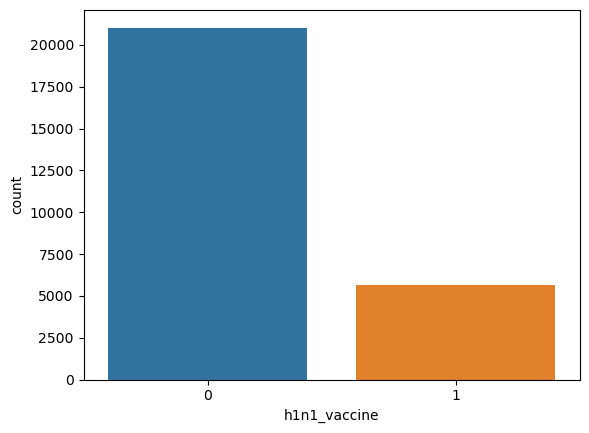

In [459]:
sns.countplot(x="h1n1_vaccine", data=labels);

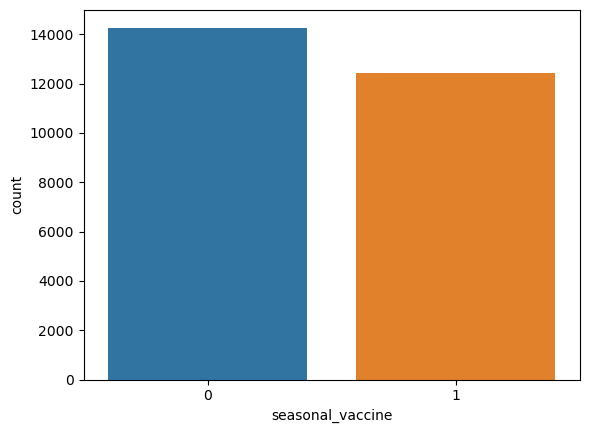

In [460]:
sns.countplot(x="seasonal_vaccine", data=labels);

### Dealing with outliers

C:\Users\danie\AppData\Local\Temp\ipykernel_6952\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

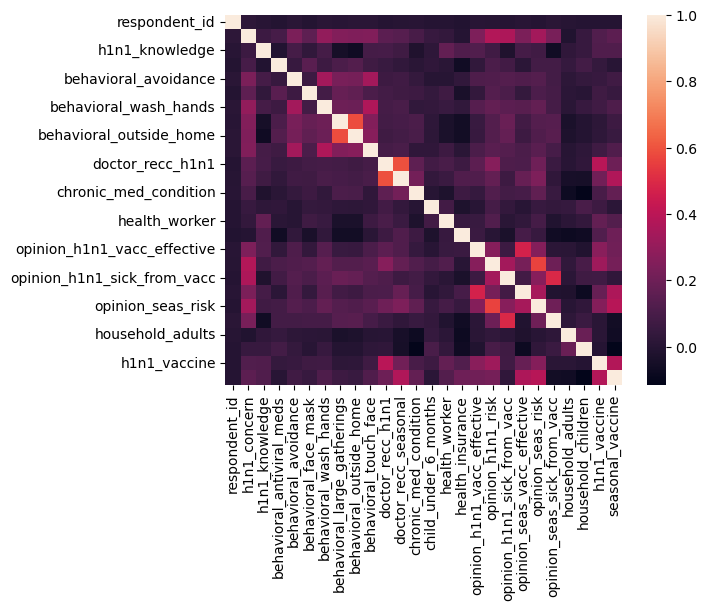

In [461]:
sns.heatmap(data.corr())

In [462]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [463]:
sns.boxplot(features.household_children)

AttributeError: 'DataFrame' object has no attribute 'household_children'

<AxesSubplot: >

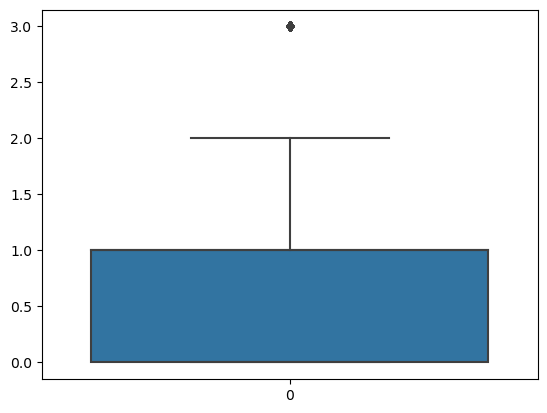

In [ ]:
sns.boxplot(features.household_adults)

In [ ]:
features.astype('int')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,1,0,0,0,0,0,0,1,1,0,...,1,3,0,2,1,0,1,2,0,0
1,3,2,0,1,0,1,0,1,1,0,...,0,3,1,2,1,1,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,2,3,1,0,1,0,0,0,2,0
3,1,1,0,1,0,1,1,0,0,0,...,0,3,0,2,1,1,1,1,0,0
4,2,1,0,1,0,1,1,0,1,0,...,3,3,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2,0,0,1,0,0,0,1,0,0,...,3,3,0,0,1,0,1,2,0,0
26703,1,2,0,1,0,1,0,0,0,1,...,2,3,1,0,1,1,0,1,1,0
26704,2,2,0,1,1,1,1,0,1,0,...,3,3,0,3,1,0,3,0,0,0
26705,1,1,0,0,0,0,0,0,1,0,...,3,1,0,0,0,1,0,2,1,0


### Plotting Standard Deviation

In [ ]:
features.std()

h1n1_concern                   0.909016
h1n1_knowledge                 0.617047
behavioral_antiviral_meds      0.215273
behavioral_avoidance           0.445127
behavioral_face_mask           0.253345
behavioral_wash_hands          0.379213
behavioral_large_gatherings    0.479264
behavioral_outside_home        0.472444
behavioral_touch_face          0.466942
doctor_recc_h1n1               0.401866
doctor_recc_seasonal           0.459592
chronic_med_condition          0.445490
child_under_6_months           0.271382
health_worker                  0.311077
opinion_h1n1_vacc_effective    1.000195
opinion_h1n1_risk              1.276825
opinion_h1n1_sick_from_vacc    1.353339
opinion_seas_vacc_effective    1.077131
opinion_seas_risk              1.375216
opinion_seas_sick_from_vacc    1.319585
age_group                      1.457320
education                      1.186442
race                           0.923226
sex                            0.491136
income_poverty                 1.113444


In [ ]:
std = labels['h1n1_vaccine'].std()
avg = labels['h1n1_vaccine'].std()

In [ ]:
avg + std #1std above the mean

0.8181035868580915

In [ ]:
avg-std #1std below the mean

0.0

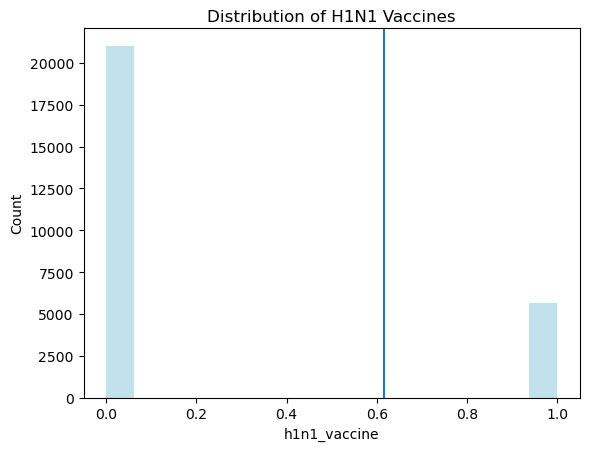

In [ ]:
sns.histplot(x = labels['h1n1_vaccine'], color = 'lightblue', edgecolor = None )
plt.title("Distribution of H1N1 Vaccines", pad=5)

plt.axvline(x = 0.616261209611533, ymin = 0, ymax = labels["h1n1_vaccine"].max())

Standard distribution of H1N1 vaccines using a quantile range

We will analyse which features may assist in the prediction of vaccination decision. 
We will begin by evaluating all the behavioural related variables below: 

- behavioral_antiviral_meds      
- behavioral_avoidance           
- behavioral_face_mask           
- behavioral_wash_hands          
- behavioral_large_gatherings    
- behavioral_outside_home        
- behavioral_touch_face

The data is binary.

# Cross Tabulation

In [ ]:
def crosstab(x, y):

    return pd.crosstab(x, y, normalize='columns')*100

In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_antiviral_meds'])

behavioral_antiviral_meds,0.0,1.0
h1n1_vaccine,,
0,79.126978,71.483474
1,20.873022,28.516526


In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_avoidance'])

behavioral_avoidance,0.0,1.0
h1n1_vaccine,,
0,81.886948,77.582836
1,18.113052,22.417164


In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_face_mask'])

behavioral_face_mask,0.0,1.0
h1n1_vaccine,,
0,79.538325,68.169473
1,20.461675,31.830527


In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_wash_hands'])

behavioral_wash_hands,0.0,1.0
h1n1_vaccine,,
0,85.397849,77.354128
1,14.602151,22.645872


In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_large_gatherings'])

behavioral_large_gatherings,0.0,1.0
h1n1_vaccine,,
0,79.306527,77.762648
1,20.693473,22.237352


In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_outside_home'])

behavioral_outside_home,0.0,1.0
h1n1_vaccine,,
0,79.397495,77.485803
1,20.602505,22.514197


In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_touch_face'])

behavioral_touch_face,0.0,1.0
h1n1_vaccine,,
0,82.968058,76.760991
1,17.031942,23.239009


We can see that from all behavioral based variables, there is a slight uptrend of positive actions leading to people taking the vaccine.

### Visualisation

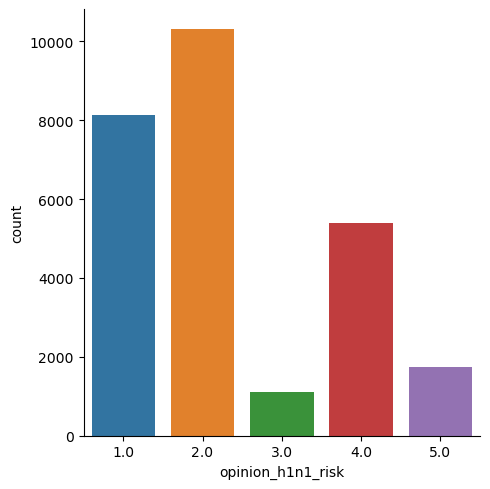

In [ ]:
sns.catplot(data = features, x = "opinion_h1n1_risk", kind = "count")

Most people are not worried about the H1N1 vaccine

## Feature Scaling

In [464]:
X = features
y = labels

In [465]:
X = StandardScaler().fit_transform(X)

## Feature Selection

### Applying PCA

In [466]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

## Creating the models

In [467]:
X

array([[-0.37521796,  1.5085512 , -0.80964769, ..., -0.34658204,
        -0.26455999, -0.09701104],
       [-0.37521796, -0.66288768, -0.80964769, ..., -0.34658204,
        -0.26455999, -0.09701104],
       [-0.37521796,  1.5085512 , -0.80964769, ..., -0.34658204,
        -0.26455999, -0.09701104],
       ...,
       [-0.37521796, -0.66288768,  1.23510511, ..., -0.34658204,
        -0.26455999, -0.09701104],
       [-0.37521796,  1.5085512 , -0.80964769, ..., -0.34658204,
        -0.26455999, -0.09701104],
       [ 2.66511762, -0.66288768, -0.80964769, ..., -0.34658204,
        -0.26455999, -0.09701104]])

In [468]:
features.head()

,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_concern_nan,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,h1n1_knowledge_nan,behavioral_antiviral_meds_0.0,...,household_adults_0.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_adults_nan,household_children_0.0,household_children_1.0,household_children_2.0,household_children_3.0,household_children_nan
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [469]:
y

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


### Train/Test Split

In [470]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 30)

In [471]:
#Driven data function to evaluate model's performance
def plot_roc(y_true, y_score, label_name, ax, color=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    if color:
        ax.set_facecolor('lightblue')
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {metrics.roc_auc_score(y_true, y_score):.4f}"
    )

### Naive Bayes

In [472]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance

brmodel = BinaryRelevance(GaussianNB())

brmodel.fit(x_train, y_train)

y_prediction_nb = brmodel.predict(x_test)



In [473]:
accuracy_nb = accuracy_score(y_test, y_prediction_nb)
accuracy_nb

0.497079526733563

### Linear SVC using Multi Output Classifier

The MultiOutputClassifier is convenient since it simplifies the process and you can predict both labels in just one step. 
On the other hand predicting the two labels separately gives you more control and you may be able to fine tune the model for each case or even use two completely different models.

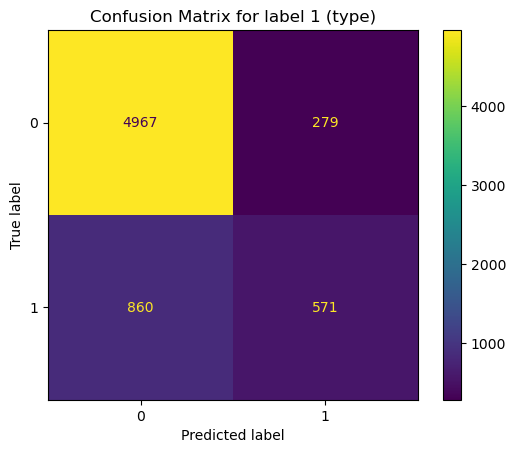

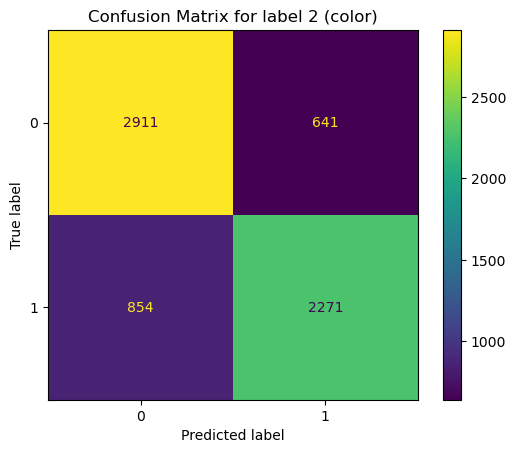

In [474]:

from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(x_train, y_train)

# Get predictions for test data
y_test_pred = multilabel_classifier.predict(x_test)

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_test_pred)

# Plotting matrices: code
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1 (type)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2 (color)')
plt.show()

In [475]:
accuracy_svc = accuracy_score(y_test, y_test_pred)
accuracy_svc

0.6655683690280065

### Random Forest 

In [476]:
random_forest = RandomForestClassifier()

In [477]:
random_forest.fit(x_train, y_train)

y_prediction_rf = random_forest.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_prediction_rf)
accuracy_rf

0.6627227796914782

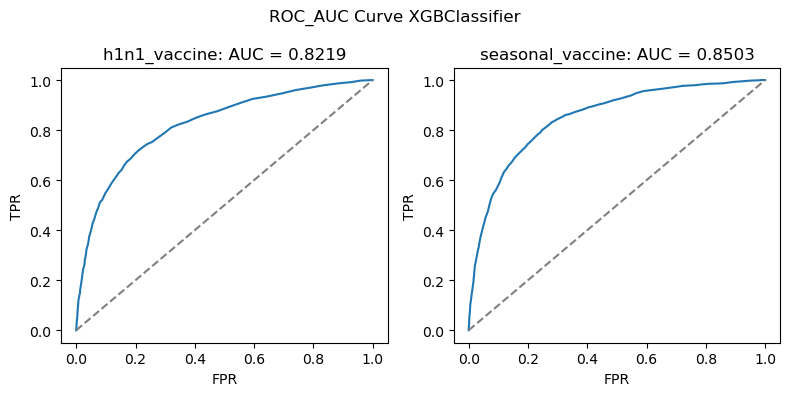

In [478]:
y_preds = random_forest.predict_proba(x_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle(f"ROC_AUC Curve XGBClassifier")

plot_roc(y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

In [479]:
metrics.roc_auc_score(y_test, y_preds_both)

0.8360860166363179

We use the support vector classicier with a linear kernel

### Multilabel K-Nearest Neighbour

### XGBoost Classifier

In [480]:
import xgboost as xgb

xgb_cl = MultiOutputClassifier(estimator=xgb.XGBClassifier(n_estimators=1000, verbosity=1, n_jobs=-1, learning_rate=0.05))
xgb_cl.fit(x_train, y_train)
preds = xgb_cl.predict(x_test)

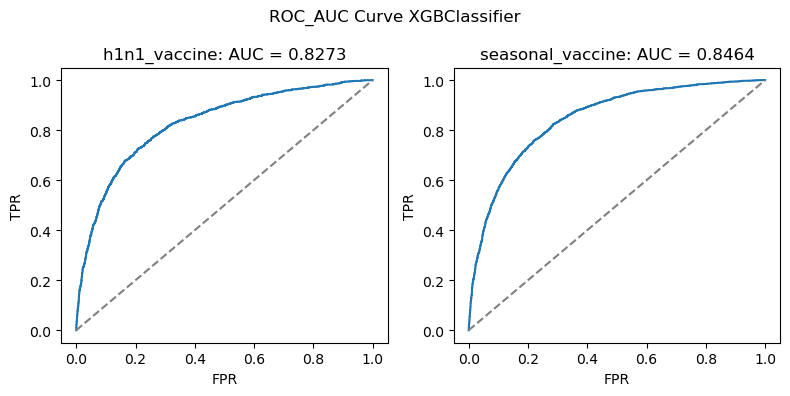

In [481]:
y_preds = xgb_cl.predict_proba(x_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle(f"ROC_AUC Curve XGBClassifier")

plot_roc(y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

In [482]:
metrics.roc_auc_score(y_test, y_preds_both)

0.8368786683051533

### TESTING OTHER MODELS

## Submission Dataframe

In [483]:
y_test_h1n1 = y_test.loc[:, ['h1n1_vaccine']]
y_test_seasonal = y_test.loc[:, ["seasonal_vaccine"]]

In [484]:
y_test_h1n1.shape

(6677, 1)

In [485]:
y_pred_h1n1 = y_preds_both.loc[:, 'h1n1_vaccine']
y_pred_seasonal = y_preds_both.loc[:, "seasonal_vaccine"]

In [486]:
target = ["Non-Vaccinated", "Vaccinated"]

H1N1 Vaccines

In [487]:
print(metrics.classification_report(y_test_h1n1.round(), y_pred_h1n1.round(), target_names = target))

                precision    recall  f1-score   support

Non-Vaccinated       0.86      0.94      0.90      5246
    Vaccinated       0.65      0.44      0.52      1431

      accuracy                           0.83      6677
     macro avg       0.75      0.69      0.71      6677
  weighted avg       0.81      0.83      0.82      6677



Seasonal Vaccines

In [488]:
print(metrics.classification_report(y_test_seasonal.round(), y_pred_seasonal.round(), target_names = target))

                precision    recall  f1-score   support

Non-Vaccinated       0.78      0.79      0.79      3552
    Vaccinated       0.76      0.74      0.75      3125

      accuracy                           0.77      6677
     macro avg       0.77      0.77      0.77      6677
  weighted avg       0.77      0.77      0.77      6677



## Submission File

Pre-processing of testing features dataframe

In [489]:
def testing_preprocessing():

    test_features_df = pd.read_csv("test_set_features.csv")
    test_features_df.tail()
    test_features_df.drop(["respondent_id", "hhs_geo_region", "employment_industry", "employment_occupation"], axis = 1, inplace = True)

    numeric_data = test_features_df._get_numeric_data()

    for column in numeric_data:
        test_features_df[column].fillna(test_features_df[column].median(), inplace= True)
        
    for column in categorical_data:
        test_features_df[column].fillna(test_features_df[column].mode()[0], inplace=True)

    test_features_df[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']] = test_features_df[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']].apply(enc.fit_transform)

    test_features_df[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']]

    return test_features_df

In [490]:
test_df = testing_preprocessing()

c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=['35 - 44 Years' '18 - 34 Years' '55 - 64 Years' ... '18 - 34 Years'
 '55 - 64 Years' '45 - 54 Years'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
test_df.tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2,3,0,0,0,0,0,1,1.0,1.0
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,3,1,2,0,1,0,2,1.0,3.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,0,2,1,1,1,0,1.0,0.0
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,3,0,0,0,0,1,0,1.0,0.0
26707,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2,3,0,0,1,1,0,1,0.0,0.0


In [ ]:
test_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2,1,0,1,1,1,0,0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,2,1,1,0,2,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,2,3,1,1,0,0,0,2,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,3,0,0,0,0,1,0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,2,0.0,1.0


In [ ]:
scaler = MinMaxScaler()
test_df = scaler.fit_transform(test_df)

In [ ]:
test_probs = regressor.predict(test_df)
test_probs

NameError: name 'regressor' is not defined

In [ ]:
submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")

In [ ]:
submission_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [ ]:
submission_df["h1n1_vaccine"] = test_probs[0][:, 1]
submission_df["seasonal_vaccine"] = test_probs[1][:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)
submission_df.head(10)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7
26712,0.5,0.7
26713,0.5,0.7
26714,0.5,0.7
26715,0.5,0.7
